# Section 1: Bank Credit Risk Indicators (EBA Dashboard Data)

## Data inspection

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Adjust this path based on where you placed the file in Drive
file_path = '/content/drive/MyDrive/credit-risk/KRI - Risk parameters annex - Q4 2023.xlsx'


In [3]:
import pandas as pd

# Load Excel file
xls = pd.ExcelFile(file_path)

# List all sheet names
xls.sheet_names


['Cover', '2023 Q4', 'Methodology', 'Last Page']

In [4]:
xls.sheet_names

['Cover', '2023 Q4', 'Methodology', 'Last Page']

In [5]:
# Load the 2023 Q4 sheet into a DataFrame
df = pd.read_excel(xls, sheet_name='2023 Q4')

# Show the first 10 rows
df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,25th = 25th percentilE; 50th = 50th percent...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Risk Parameters statistics by country of the c...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,EU and main non-EU countries,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,2023 Q4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,(Source COREP C 9.02),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,Only statistics for countries having more than...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# 1. Re-load the sheet, skipping the top 9 rows (adjust if needed)
df = pd.read_excel(
    file_path,
    sheet_name='2023 Q4',
    skiprows=10  # skips rows 0–9, so row 10 becomes our header
)

# 2. Reset the index and take a quick look
df = df.reset_index(drop=True)
df.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,Default rate,NaN,NaN,NaN,NaN,Loss rate,NaN,...,PD - adjusted,NaN,NaN,NaN,NaN,LGD,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,N,25th,50th,75th,W.A,N,25th,...,N,25th,50th,75th,W.A,N,25th,50th,75th,W.A
2,NaN,Austria,Corporates,15,0,0.004652,0.014521,0.01083,11,0.064255,...,54,0.002897,0.006039,0.012996,0.012035,55,0.332984,0.407,0.45,0.340091
3,NaN,NaN,Corporates - Of Which: Specialised Lending,5,0,0.012455,0.02603,0.018162,NaN,NaN,...,15,0.0024,0.004183,0.014,0.009149,15,0.1566,0.180018,0.4065,0.244076
4,NaN,NaN,Corporates - Of Which: SME,9,0.001488,0.013727,0.045189,0.023742,6,0.139258,...,29,0.0053,0.020555,0.0282,0.022149,30,0.182958,0.366433,0.45,0.302864


In [7]:
# 1. Read the sheet without headers, skipping the top 9 rows
raw = pd.read_excel(
    file_path,
    sheet_name='2023 Q4',
    header=None,
    skiprows=9
)

# 2. Grab the row that contains the real column names (it’s the second row in raw)
new_header = raw.iloc[1]

# 3. Create the DataFrame with the data below that header
df = raw[2:].copy()
df.columns = new_header

# 4. Reset the index
df = df.reset_index(drop=True)

# 5. Quick look
df.head()


1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,Default rate,NaN,NaN,NaN,NaN,Loss rate,NaN,...,PD - adjusted,NaN,NaN,NaN,NaN,LGD,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,N,25th,50th,75th,W.A,N,25th,...,N,25th,50th,75th,W.A,N,25th,50th,75th,W.A
2,NaN,Austria,Corporates,15,0,0.004652,0.014521,0.01083,11,0.064255,...,54,0.002897,0.006039,0.012996,0.012035,55,0.332984,0.407,0.45,0.340091
3,NaN,NaN,Corporates - Of Which: Specialised Lending,5,0,0.012455,0.02603,0.018162,NaN,NaN,...,15,0.0024,0.004183,0.014,0.009149,15,0.1566,0.180018,0.4065,0.244076
4,NaN,NaN,Corporates - Of Which: SME,9,0.001488,0.013727,0.045189,0.023742,6,0.139258,...,29,0.0053,0.020555,0.0282,0.022149,30,0.182958,0.366433,0.45,0.302864


In [8]:
# 1. List the column names
print(df.columns.tolist())

[np.float64(nan), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [9]:
# 1. Read the sheet, using row 10 (zero-based index) as the header
df = pd.read_excel(
    file_path,
    sheet_name='2023 Q4',
    header=10        # pandas will take row 11 in Excel as the header
)

# 2. Drop any leftover Unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# 3. Inspect
print(df.columns.tolist())
df.head()


[]


""
0
1
2
3
4


In [10]:
import pandas as pd

# Read rows 12 & 13 (zero‐based 11 & 12) as a MultiIndex header
df = pd.read_excel(
    file_path,
    sheet_name='2023 Q4',
    header=[11, 12]
)

In [11]:
# Drop the very first blank column
df = df.drop(columns=df.columns[0])

# Rename the next two columns to 'country' and 'sector'
df = df.rename(columns={
    df.columns[0]: 'country',
    df.columns[1]: 'sector'
})


In [12]:
# For every remaining MultiIndex column, e.g. ('Default rate','50th') → 'default_rate_50th'
flat_cols = []
for lvl0, lvl1 in df.columns[2:]:
    name  = lvl0.strip().lower().replace(' ', '_')   # e.g. 'default_rate'
    quant = lvl1.strip().lower()                     # e.g. '50th'
    flat_cols.append(f"{name}_{quant}")

# Put it all together
df.columns = ['country', 'sector'] + flat_cols


In [13]:
# Assuming df is already read with header=[11,12]
# Drop the first truly blank column (if still there)
df = df.loc[:, ~df.columns.to_flat_index().str.contains('^Unnamed')]

# Rename the first two columns explicitly
df = df.rename(columns={df.columns[0]:'country', df.columns[1]:'sector'})

# Build flat names for all remaining columns
flat_cols = []
for col in df.columns[2:]:
    # col might be a tuple like ('Default rate','50th','Unnamed: 13')
    parts = []
    for lvl in col if isinstance(col, tuple) else [col]:
        txt = str(lvl).strip()
        if txt and not txt.startswith('Unnamed'):
            parts.append(txt.lower().replace(' ', '_'))
    flat_cols.append('_'.join(parts))

# Reassign the new columns
df.columns = ['country','sector'] + flat_cols

# Quick check
print(df.columns.tolist())
df.head()


['country', 'sector', 'default_rate_n', 'default_rate_25th', 'default_rate_50th', 'default_rate_75th', 'default_rate_w.a', 'loss_rate_n', 'loss_rate_25th', 'loss_rate_50th', 'loss_rate_75th', 'loss_rate_w.a', 'pd_-_adjusted_n', 'pd_-_adjusted_25th', 'pd_-_adjusted_50th', 'pd_-_adjusted_75th', 'pd_-_adjusted_w.a', 'lgd_n', 'lgd_25th', 'lgd_50th', 'lgd_75th', 'lgd_w.a']


,country,sector,default_rate_n,default_rate_25th,default_rate_50th,default_rate_75th,default_rate_w.a,loss_rate_n,loss_rate_25th,loss_rate_50th,...,pd_-_adjusted_n,pd_-_adjusted_25th,pd_-_adjusted_50th,pd_-_adjusted_75th,pd_-_adjusted_w.a,lgd_n,lgd_25th,lgd_50th,lgd_75th,lgd_w.a
0,Austria,Corporates,15.0,0.000000,0.004652,0.014521,0.010830,11.0,0.064255,0.177149,...,54.0,0.002897,0.006039,0.012996,0.012035,55.0,0.332984,0.407000,0.450000,0.340091
1,NaN,Corporates - Of Which: Specialised Lending,5.0,0.000000,0.012455,0.026030,0.018162,NaN,NaN,NaN,...,15.0,0.002400,0.004183,0.014000,0.009149,15.0,0.156600,0.180018,0.406500,0.244076
2,NaN,Corporates - Of Which: SME,9.0,0.001488,0.013727,0.045189,0.023742,6.0,0.139258,0.212015,...,29.0,0.005300,0.020555,0.028200,0.022149,30.0,0.182958,0.366433,0.450000,0.302864
3,NaN,Retail,28.0,0.001435,0.008518,0.018061,0.006530,24.0,0.192768,0.265025,...,63.0,0.004900,0.011310,0.022445,0.014551,65.0,0.165599,0.231900,0.288700,0.303202
4,NaN,Retail - Secured on real estate property,9.0,0.000012,0.005266,0.006181,0.003915,7.0,0.038377,0.059710,...,59.0,0.002500,0.007000,0.015645,0.012115,60.0,0.133700,0.167700,0.224103,0.195113


In [14]:
corp = df[df['sector']=='Corporates']


In [15]:
for col in flat_cols:
    corp[col] = pd.to_numeric(corp[col], errors='coerce')

<ipython-input-15-3566167734>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corp[col] = pd.to_numeric(corp[col], errors='coerce')


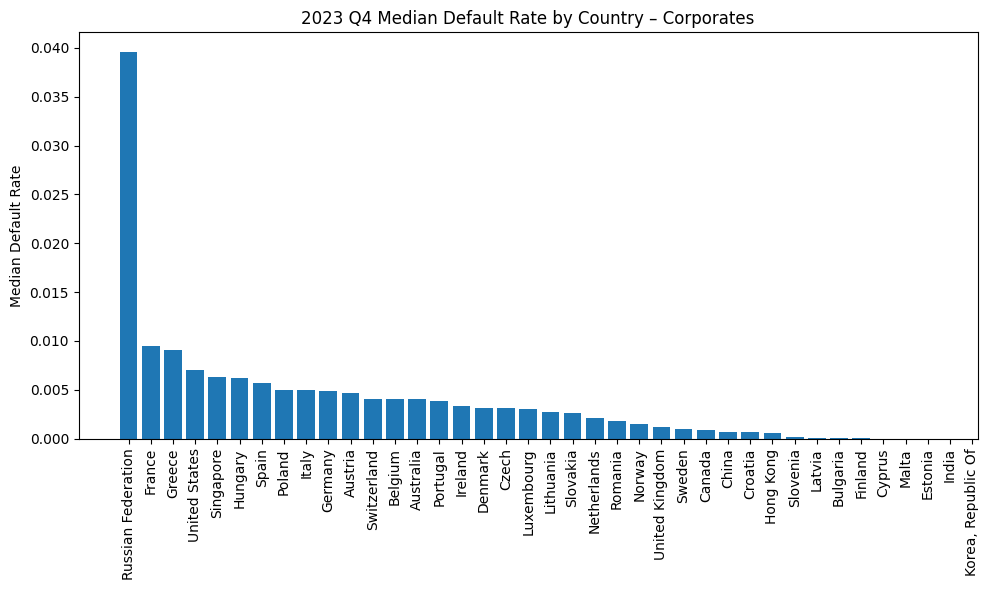

In [16]:
import matplotlib.pyplot as plt

corp = corp.sort_values('default_rate_50th', ascending=False)
plt.figure(figsize=(10,6))
plt.bar(corp['country'], corp['default_rate_50th'])
plt.xticks(rotation=90)
plt.ylabel('Median Default Rate')
plt.title('2023 Q4 Median Default Rate by Country – Corporates')
plt.tight_layout()
plt.show()


In [17]:
# 1. Define the 27 EU members
eu_countries = [
    'Austria','Belgium','Bulgaria','Croatia','Cyprus','Czechia','Denmark','Estonia',
    'Finland','France','Germany','Greece','Hungary','Ireland','Italy','Latvia',
    'Lithuania','Luxembourg','Malta','Netherlands','Poland','Portugal','Romania',
    'Slovakia','Slovenia','Spain','Sweden'
]

# 2. Subset to EU only
eu_df = df[df['country'].isin(eu_countries)].copy()

# 3. Quick check
print(f"Rows before filtering: {len(df)}")
print(f"Rows after filtering:  {len(eu_df)}")
print("Remaining countries:", eu_df['country'].unique())


Rows before filtering: 273
Rows after filtering:  50
Remaining countries: ['Austria' 'Belgium' 'Bulgaria' 'Croatia' 'Cyprus' 'Denmark' 'Estonia'
 'Finland' 'France' 'Germany' 'Greece' 'Hungary' 'Ireland' 'Italy'
 'Latvia' 'Lithuania' 'Luxembourg' 'Malta' 'Netherlands' 'Poland'
 'Portugal' 'Romania' 'Slovakia' 'Slovenia' 'Spain' 'Sweden']


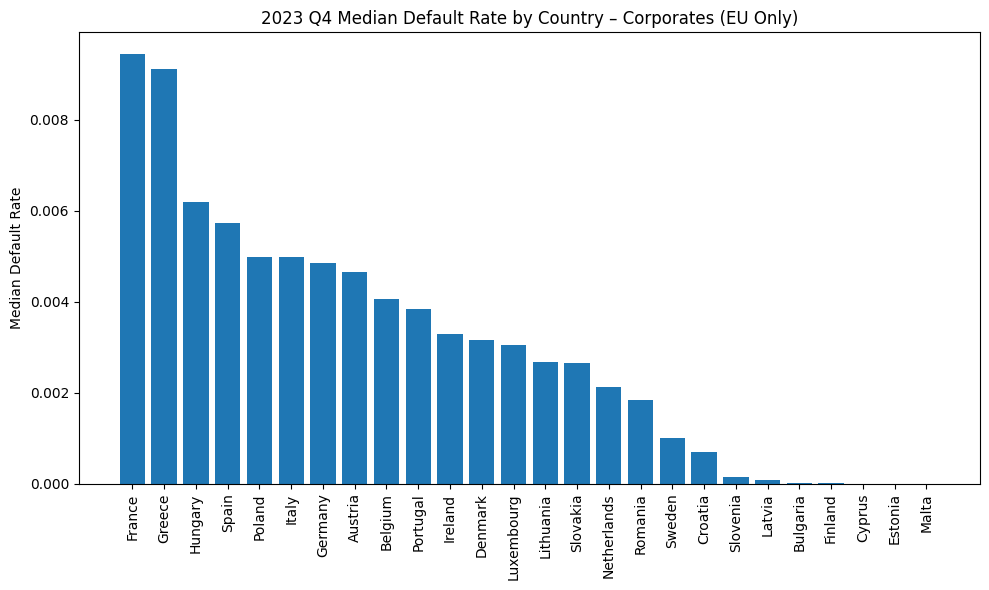

In [18]:
# Example for the 'Corporates' sector
corp_eu = eu_df[eu_df['sector']=='Corporates']

# Sort and plot median default rate
corp_eu = corp_eu.sort_values('default_rate_50th', ascending=False)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(corp_eu['country'], corp_eu['default_rate_50th'])
plt.xticks(rotation=90)
plt.ylabel('Median Default Rate')
plt.title('2023 Q4 Median Default Rate by Country – Corporates (EU Only)')
plt.tight_layout()
plt.show()


In [19]:
df['sector']=='N'


,sector
0,False
1,False
2,False
3,False
4,False
...,...
268,False
269,False
270,False
271,False


### Plot Loss Rate by Country8 (EU, Corporates)

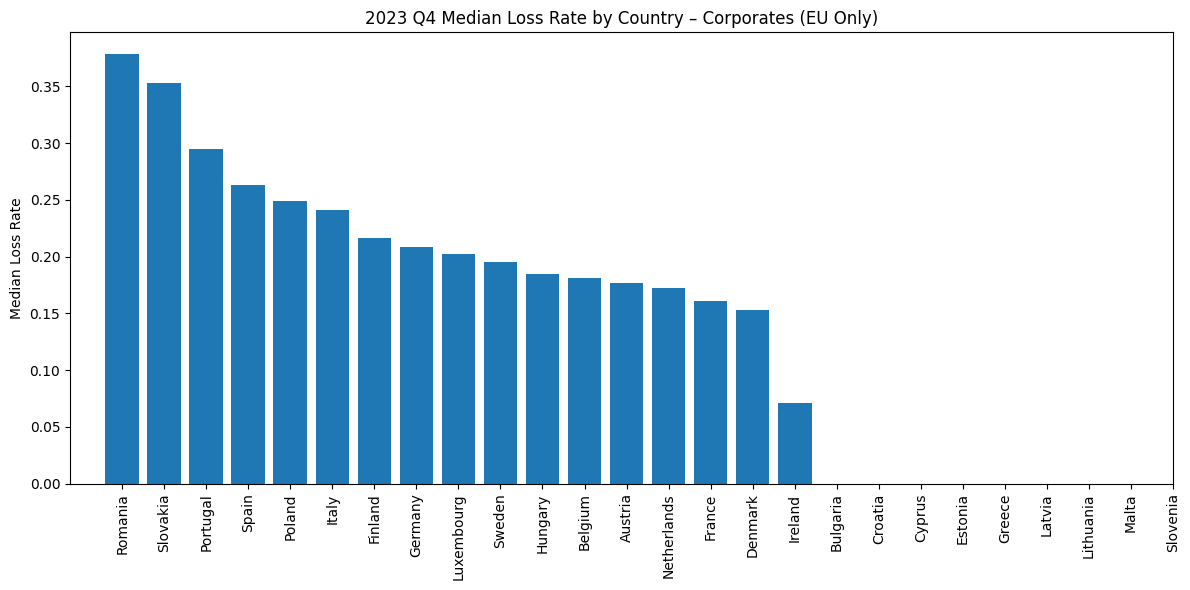

In [20]:
# 1. Extract corporates again (EU only)
corp_eu = eu_df[eu_df['sector']=='Corporates'].copy()

# 2. Sort by median loss rate
corp_eu = corp_eu.sort_values('loss_rate_50th', ascending=False)

# 3. Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(corp_eu['country'], corp_eu['loss_rate_50th'])
plt.xticks(ticks=range(len(corp_eu)), labels=corp_eu['country'], rotation=90)
plt.ylabel('Median Loss Rate')
plt.title('2023 Q4 Median Loss Rate by Country – Corporates (EU Only)')
plt.tight_layout()
plt.show()


# Section 2 Macroeconomic Environnement & Market Sentiment

## GDP Growth (EU27)

### Data inspection

In [21]:
gdp_file = '/content/drive/MyDrive/credit-risk/estat_tec00115_filtered_en.csv'


In [22]:
gdp_df = pd.read_csv(gdp_file)
gdp_df.head()


,DATAFLOW,LAST UPDATE,freq,unit,na_item,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS
0,ESTAT:TEC00115(1.0),13/06/25 11:00:00,Annual,"Chain linked volumes, percentage change on pre...",Gross domestic product at market prices,Albania,2013,1.7,NaN,NaN
1,ESTAT:TEC00115(1.0),13/06/25 11:00:00,Annual,"Chain linked volumes, percentage change on pre...",Gross domestic product at market prices,Albania,2014,2.2,NaN,NaN
2,ESTAT:TEC00115(1.0),13/06/25 11:00:00,Annual,"Chain linked volumes, percentage change on pre...",Gross domestic product at market prices,Albania,2015,2.2,NaN,NaN
3,ESTAT:TEC00115(1.0),13/06/25 11:00:00,Annual,"Chain linked volumes, percentage change on pre...",Gross domestic product at market prices,Albania,2016,3.9,NaN,NaN
4,ESTAT:TEC00115(1.0),13/06/25 11:00:00,Annual,"Chain linked volumes, percentage change on pre...",Gross domestic product at market prices,Albania,2017,3.3,NaN,NaN


In [23]:
"European Union - 27 countries (from 2020)"


'European Union - 27 countries (from 2020)'

In [24]:
# Filter for EU27 only
eu_gdp = gdp_df[gdp_df['geo'] == 'European Union - 27 countries (from 2020)']


In [25]:
print(gdp_df.columns.tolist())


['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'na_item', 'geo', 'TIME_PERIOD', 'OBS_VALUE', 'OBS_FLAG', 'CONF_STATUS']


In [26]:
# Keep only time and value columns
eu_gdp = eu_gdp[['TIME_PERIOD', 'OBS_VALUE']]

# Rename for clarity
eu_gdp.columns = ['year', 'gdp_growth']

# Convert types
eu_gdp['year'] = eu_gdp['year'].astype(str)
eu_gdp['gdp_growth'] = pd.to_numeric(eu_gdp['gdp_growth'], errors='coerce')

# Preview cleaned data
eu_gdp.head()


,year,gdp_growth
180,2013,0.0
181,2014,1.6
182,2015,2.3
183,2016,1.9
184,2017,2.8


### Plot GDP

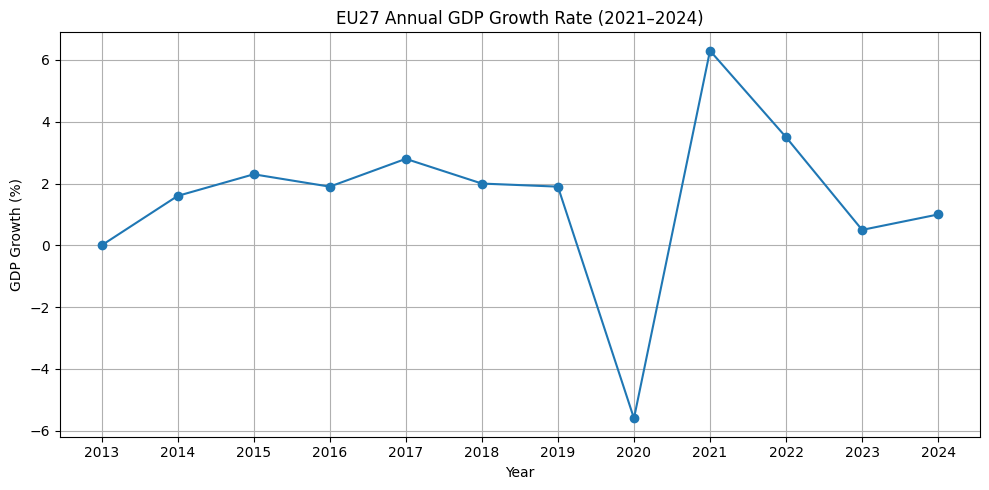

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(eu_gdp['year'], eu_gdp['gdp_growth'], marker='o')
plt.title('EU27 Annual GDP Growth Rate (2021–2024)')
plt.xlabel('Year')
plt.ylabel('GDP Growth (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


## The Unemployment Trend

### Data inspection

In [28]:
unemp_file = '/content/drive/MyDrive/credit-risk/estat_une_rt_m_filtered_en.csv'


In [29]:
# Load the CSV
unemp_df = pd.read_csv(unemp_file)

# Show the first few rows
unemp_df.head()


,DATAFLOW,LAST UPDATE,freq,s_adj,age,unit,sex,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS
0,ESTAT:UNE_RT_M(1.0),06/06/25 23:00:00,Monthly,Unadjusted data (i.e. neither seasonally adjus...,Total,Percentage of population in the labour force,Total,Austria,2019-01,5.5,NaN,NaN
1,ESTAT:UNE_RT_M(1.0),06/06/25 23:00:00,Monthly,Unadjusted data (i.e. neither seasonally adjus...,Total,Percentage of population in the labour force,Total,Austria,2019-02,6.0,NaN,NaN
2,ESTAT:UNE_RT_M(1.0),06/06/25 23:00:00,Monthly,Unadjusted data (i.e. neither seasonally adjus...,Total,Percentage of population in the labour force,Total,Austria,2019-03,5.7,NaN,NaN
3,ESTAT:UNE_RT_M(1.0),06/06/25 23:00:00,Monthly,Unadjusted data (i.e. neither seasonally adjus...,Total,Percentage of population in the labour force,Total,Austria,2019-04,5.0,NaN,NaN
4,ESTAT:UNE_RT_M(1.0),06/06/25 23:00:00,Monthly,Unadjusted data (i.e. neither seasonally adjus...,Total,Percentage of population in the labour force,Total,Austria,2019-05,4.7,NaN,NaN


In [30]:
print(unemp_df.columns.tolist())

['DATAFLOW', 'LAST UPDATE', 'freq', 's_adj', 'age', 'unit', 'sex', 'geo', 'TIME_PERIOD', 'OBS_VALUE', 'OBS_FLAG', 'CONF_STATUS']


In [31]:
# Filter for EU27
eu_unemp = unemp_df[unemp_df['geo'] == 'European Union - 27 countries (from 2020)']

# Keep only time and unemployment rate
eu_unemp = eu_unemp[['TIME_PERIOD', 'OBS_VALUE']]

# Rename for clarity
eu_unemp.columns = ['date', 'unemployment_rate']

# Convert values
eu_unemp['date'] = pd.to_datetime(eu_unemp['date'])
eu_unemp['unemployment_rate'] = pd.to_numeric(eu_unemp['unemployment_rate'], errors='coerce')

# Filter 2021 onward
eu_unemp = eu_unemp[eu_unemp['date'] >= '2021-01-01']

# Preview
eu_unemp.head()

,date,unemployment_rate
986,2021-01-01,7.9
987,2021-02-01,7.9
988,2021-03-01,7.7
989,2021-04-01,7.5
990,2021-05-01,7.2


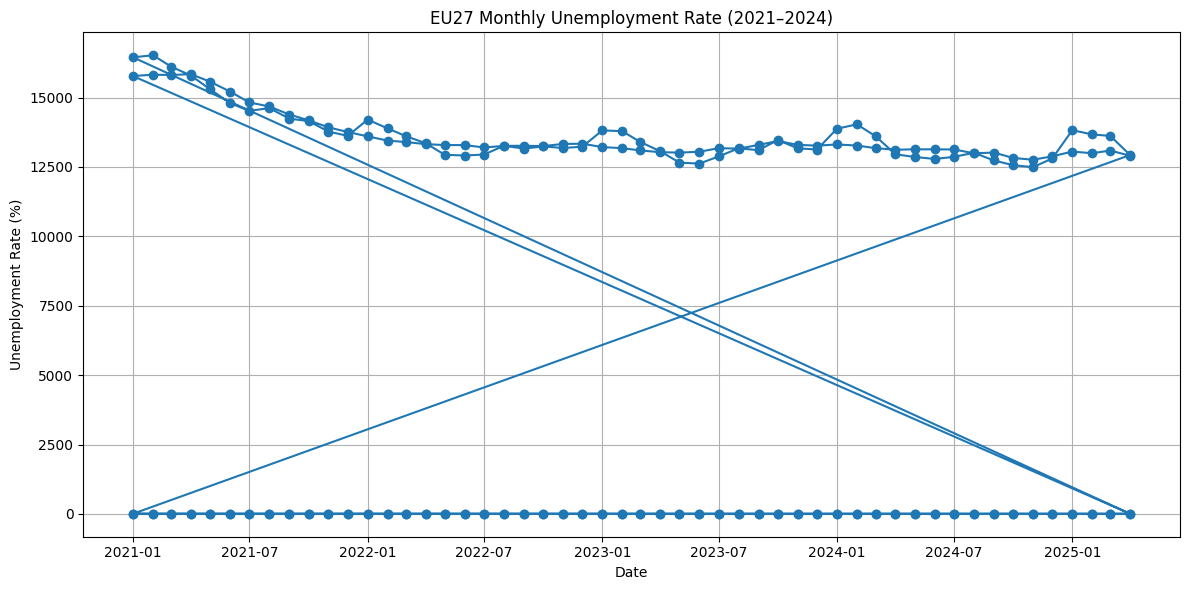

In [32]:
plt.figure(figsize=(12,6))
plt.plot(eu_unemp['date'], eu_unemp['unemployment_rate'], marker='o')
plt.title('EU27 Monthly Unemployment Rate (2021–2024)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Check the incorrect values

In [33]:
# Check unique values in the unemployment_rate column
print(eu_unemp['unemployment_rate'].unique())


[7.9000e+00 7.7000e+00 7.5000e+00 7.2000e+00 6.9000e+00 6.8000e+00
 6.6000e+00 6.4000e+00 6.7000e+00 6.5000e+00 6.2000e+00 6.0000e+00
 6.1000e+00 5.8000e+00 5.9000e+00 5.7000e+00 6.3000e+00 1.6448e+04
 1.6522e+04 1.6117e+04 1.5791e+04 1.5295e+04 1.4796e+04 1.4519e+04
 1.4618e+04 1.4240e+04 1.4150e+04 1.3774e+04 1.3619e+04 1.4204e+04
 1.3887e+04 1.3613e+04 1.3356e+04 1.2936e+04 1.2911e+04 1.2947e+04
 1.3259e+04 1.3162e+04 1.3237e+04 1.3182e+04 1.3228e+04 1.3816e+04
 1.3787e+04 1.3399e+04 1.3065e+04 1.2655e+04 1.2620e+04 1.2878e+04
 1.3170e+04 1.3104e+04 1.3468e+04 1.3169e+04 1.3127e+04 1.3877e+04
 1.4033e+04 1.3607e+04 1.2954e+04 1.2859e+04 1.2787e+04 1.2863e+04
 1.3009e+04 1.2733e+04 1.2563e+04 1.2491e+04 1.2806e+04 1.3823e+04
 1.3671e+04 1.3617e+04 1.2929e+04 7.3000e+00 7.0000e+00 1.5772e+04
 1.5824e+04 1.5810e+04 1.5841e+04 1.5569e+04 1.5213e+04 1.4822e+04
 1.4677e+04 1.4388e+04 1.4180e+04 1.3925e+04 1.3758e+04 1.3600e+04
 1.3449e+04 1.3397e+04 1.3322e+04 1.3286e+04 1.3287e+04 1.3200

### Clean the data

In [34]:
# Keep only rows with realistic unemployment rates (0–25%)
eu_unemp_clean = eu_unemp[(eu_unemp['unemployment_rate'] > 0) & (eu_unemp['unemployment_rate'] < 25)]


### Plot Unemployment Rate (with clean data)

<ipython-input-43-270718589>:7: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  .resample('A')


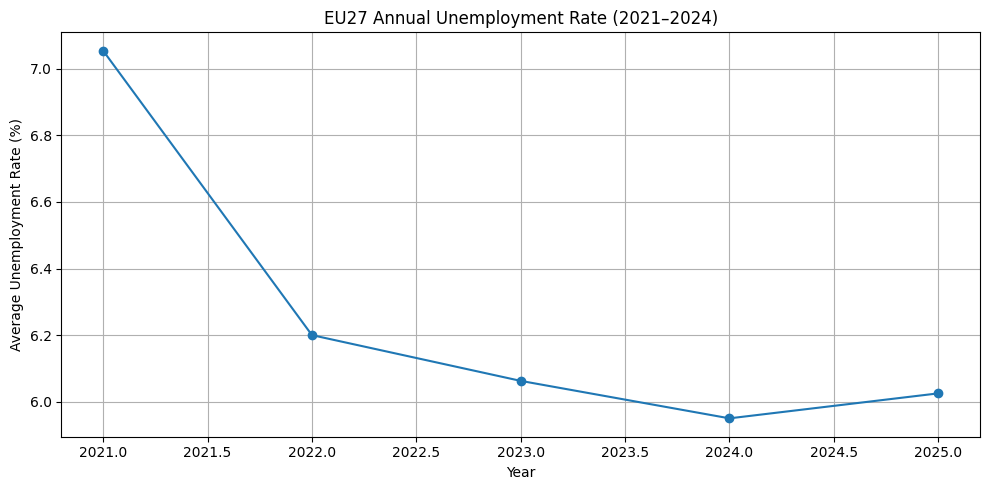

In [43]:
# convert index
df = eu_unemp_clean.set_index('date')

# resample to end‐of‐year average
annual_unemp = (
    df['unemployment_rate']
    .resample('A')
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,5))
plt.plot(annual_unemp['date'].dt.year,
         annual_unemp['unemployment_rate'],
         marker='o')
plt.title('EU27 Annual Unemployment Rate (2021–2024)')
plt.xlabel('Year')
plt.ylabel('Average Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


## Inflation – Harmonised Index of Consumer Prices (HICP)

### Data inspection

In [36]:
hicp_file = '/content/drive/MyDrive/credit-risk/estat_prc_hicp_manr_filtered_en.csv'


In [37]:
# Load the data
hicp_df = pd.read_csv(hicp_file)

# Filter to EU27 and All-items HICP
eu_hicp = hicp_df[
    (hicp_df['geo'] == 'European Union - 27 countries (from 2020)') &
    (hicp_df['coicop'] == 'All-items HICP')
]

# Keep only date and value
eu_hicp = eu_hicp[['TIME_PERIOD', 'OBS_VALUE']]
eu_hicp.columns = ['date', 'inflation_rate']

# Convert types
eu_hicp['date'] = pd.to_datetime(eu_hicp['date'])
eu_hicp['inflation_rate'] = pd.to_numeric(eu_hicp['inflation_rate'], errors='coerce')

# Filter to 2021–2024
eu_hicp = eu_hicp[(eu_hicp['date'] >= '2021-01-01') & (eu_hicp['date'] < '2025-01-01')]

# Drop duplicate months if needed
eu_hicp = eu_hicp.drop_duplicates(subset='date')

# Preview
eu_hicp.head()


,date,inflation_rate
1324,2021-01-01,1.2
1325,2021-02-01,1.3
1326,2021-03-01,1.7
1327,2021-04-01,2.0
1328,2021-05-01,2.3


### Plot Inflation Trend

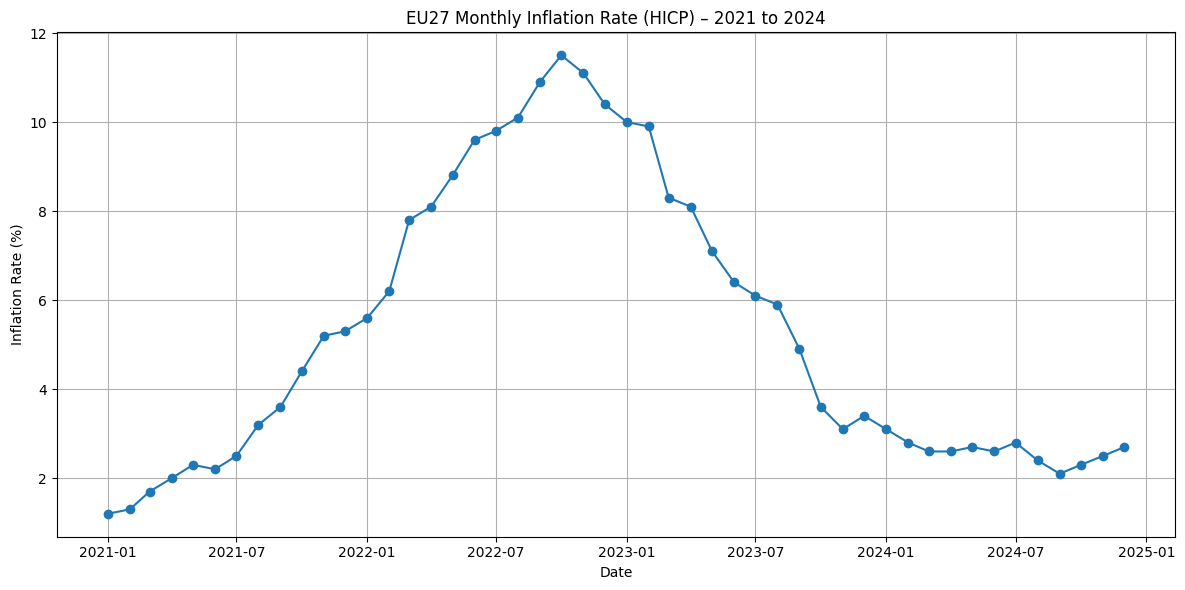

In [38]:
plt.figure(figsize=(12,6))
plt.plot(eu_hicp['date'], eu_hicp['inflation_rate'], marker='o')
plt.title('EU27 Monthly Inflation Rate (HICP) – 2021 to 2024')
plt.xlabel('Date')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Section 3 – Optional Analysis: Capital, Profitability, and Asset Quality (Q4 2023)

## Extended View of Credit Risk Metrics

In [39]:
# Keep only rows where sector is exactly 'Corporates'
risk_summary = df[df['sector'] == 'Corporates']

# Keep only relevant columns
risk_summary = risk_summary[['country', 'default_rate_w.a', 'loss_rate_w.a', 'lgd_w.a']]

# Drop any rows with missing values
risk_summary = risk_summary.dropna()

# Preview
risk_summary.head()


,country,default_rate_w.a,loss_rate_w.a,lgd_w.a
0,Austria,0.010830,0.228907,0.340091
7,Belgium,0.005786,0.174438,0.273898
35,Czech,0.006225,0.312584,0.346904
42,Denmark,0.004002,0.171817,0.234341
56,Finland,0.007843,0.146638,0.304394


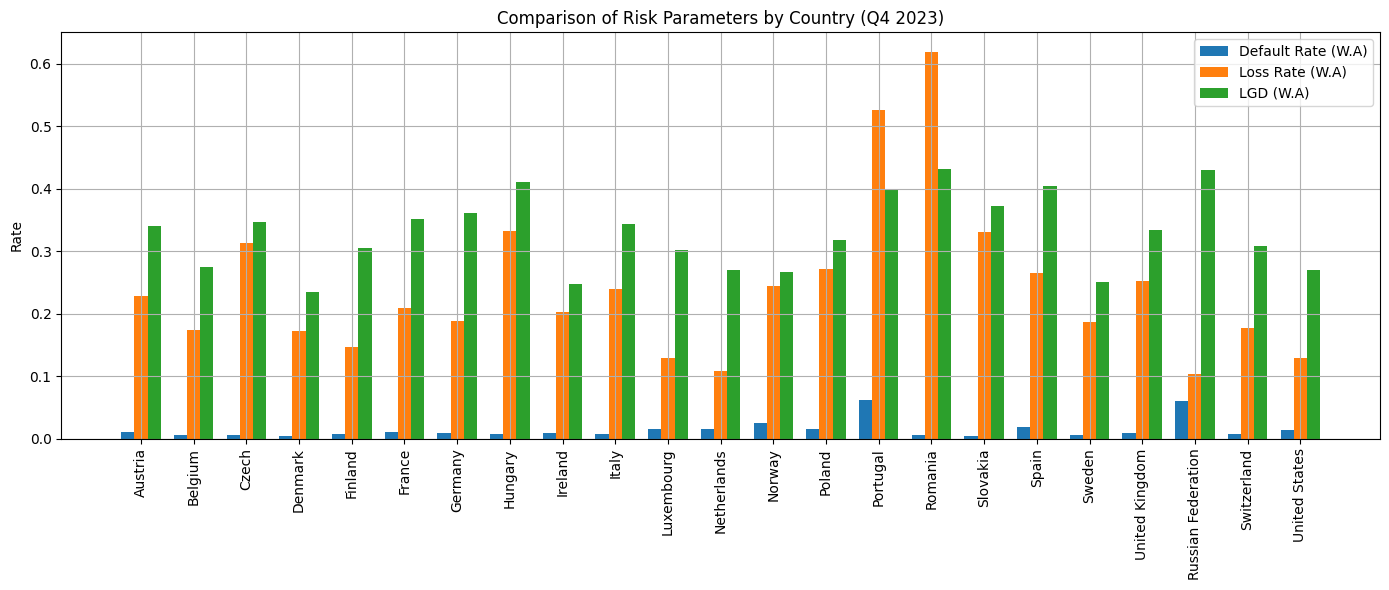

In [40]:
import numpy as np
# Set position and width
x = np.arange(len(risk_summary['country']))
width = 0.25

plt.figure(figsize=(14, 6))

# Plot each metric
plt.bar(x - width, risk_summary['default_rate_w.a'], width, label='Default Rate (W.A)')
plt.bar(x, risk_summary['loss_rate_w.a'], width, label='Loss Rate (W.A)')
plt.bar(x + width, risk_summary['lgd_w.a'], width, label='LGD (W.A)')

# Labels and legend
plt.xticks(x, risk_summary['country'], rotation=90)
plt.title('Comparison of Risk Parameters by Country (Q4 2023)')
plt.ylabel('Rate')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()
